In [1]:
# Importing useful libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Data Preparation

In [2]:
df = pd.read_csv("E:/UCI_Credit_Card.csv", index_col = "ID")

In [3]:
df.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
ID,,,,,,,,,,,,,,,,,,,,,
1,20000.0,2,2,1,24,2,2,-1,-1,-2,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
2,120000.0,2,2,2,26,-1,2,0,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
3,90000.0,2,2,2,34,0,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
4,50000.0,2,2,1,37,0,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
5,50000.0,1,2,1,57,-1,0,-1,0,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30000 entries, 1 to 30000
Data columns (total 24 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   LIMIT_BAL                   30000 non-null  float64
 1   SEX                         30000 non-null  int64  
 2   EDUCATION                   30000 non-null  int64  
 3   MARRIAGE                    30000 non-null  int64  
 4   AGE                         30000 non-null  int64  
 5   PAY_0                       30000 non-null  int64  
 6   PAY_2                       30000 non-null  int64  
 7   PAY_3                       30000 non-null  int64  
 8   PAY_4                       30000 non-null  int64  
 9   PAY_5                       30000 non-null  int64  
 10  PAY_6                       30000 non-null  int64  
 11  BILL_AMT1                   30000 non-null  float64
 12  BILL_AMT2                   30000 non-null  float64
 13  BILL_AMT3                   300

In [5]:
df[['LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6']].describe()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000
mean,167484.322667,1.603733,1.853133,1.551867,35.485500,-0.016700,-0.133767,-0.166200,-0.220667,-0.266200,-0.291100
std,129747.661567,0.489129,0.790349,0.521970,9.217904,1.123802,1.197186,1.196868,1.169139,1.133187,1.149988
min,10000.000000,1.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000
25%,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000
50%,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1000000.000000,2.000000,6.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000


In [6]:
# Data preprocessing
df = df.rename(columns={'PAY_0': 'PAY_1'}) # Renaming the column

# The 0 in Marriage can be considered as same as 3 category (others)
df.loc[df.MARRIAGE == 0, 'MARRIAGE'] = 3 

# The 0, 5 and 6 category in Education column can be considered as 4 category (others)
fil = (df.EDUCATION == 5) | (df.EDUCATION == 6) | (df.EDUCATION == 0)
df.loc[fil, 'EDUCATION'] = 4

# According to our documentation, the PAY_n variables indicate the number of 
# months of delay and indicates "pay duly"with -1. Then what is -2? 
# And what is 0? It seems to me the label has to be adjusted to 0 for pay duly.
fil = (df.PAY_1 == -2) | (df.PAY_1 == -1) | (df.PAY_1 == 0)
df.loc[fil, 'PAY_1'] = 0
fil = (df.PAY_2 == -2) | (df.PAY_2 == -1) | (df.PAY_2 == 0)
df.loc[fil, 'PAY_2'] = 0
fil = (df.PAY_3 == -2) | (df.PAY_3 == -1) | (df.PAY_3 == 0)
df.loc[fil, 'PAY_3'] = 0
fil = (df.PAY_4 == -2) | (df.PAY_4 == -1) | (df.PAY_4 == 0)
df.loc[fil, 'PAY_4'] = 0
fil = (df.PAY_5 == -2) | (df.PAY_5 == -1) | (df.PAY_5 == 0)
df.loc[fil, 'PAY_5'] = 0
fil = (df.PAY_6 == -2) | (df.PAY_6 == -1) | (df.PAY_6 == 0)
df.loc[fil, 'PAY_6'] = 0

In [7]:
df.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
ID,,,,,,,,,,,,,,,,,,,,,
1,20000.0,2,2,1,24,2,2,0,0,0,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
2,120000.0,2,2,2,26,0,2,0,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
3,90000.0,2,2,2,34,0,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
4,50000.0,2,2,1,37,0,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
5,50000.0,1,2,1,57,0,0,0,0,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0


In [8]:
df = pd.get_dummies(df, columns = ['SEX', 'EDUCATION', 'MARRIAGE'], drop_first = True)

In [9]:
df.head()

,LIMIT_BAL,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,...,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month,SEX_2,EDUCATION_2,EDUCATION_3,EDUCATION_4,MARRIAGE_2,MARRIAGE_3
ID,,,,,,,,,,,,,,,,,,,,,
1,20000.0,24,2,2,0,0,0,0,3913.0,3102.0,...,0.0,0.0,0.0,1,1,1,0,0,0,0
2,120000.0,26,0,2,0,0,0,2,2682.0,1725.0,...,1000.0,0.0,2000.0,1,1,1,0,0,1,0
3,90000.0,34,0,0,0,0,0,0,29239.0,14027.0,...,1000.0,1000.0,5000.0,0,1,1,0,0,1,0
4,50000.0,37,0,0,0,0,0,0,46990.0,48233.0,...,1100.0,1069.0,1000.0,0,1,1,0,0,0,0
5,50000.0,57,0,0,0,0,0,0,8617.0,5670.0,...,9000.0,689.0,679.0,0,0,1,0,0,0,0


In [10]:
df = df[["LIMIT_BAL", "AGE", "SEX_2", "EDUCATION_2", "EDUCATION_3", "EDUCATION_4", "MARRIAGE_2", "MARRIAGE_3", "PAY_1",	"PAY_2", "PAY_3", "PAY_4", "PAY_5", "PAY_6", "BILL_AMT1", "BILL_AMT2", "BILL_AMT3", "BILL_AMT4", "BILL_AMT5", "BILL_AMT6", "PAY_AMT1", "PAY_AMT2", "PAY_AMT3", "PAY_AMT4", "PAY_AMT5", "PAY_AMT6", "default.payment.next.month"]]

In [11]:
df.head()

,LIMIT_BAL,AGE,SEX_2,EDUCATION_2,EDUCATION_3,EDUCATION_4,MARRIAGE_2,MARRIAGE_3,PAY_1,PAY_2,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
ID,,,,,,,,,,,,,,,,,,,,,
1,20000.0,24,1,1,0,0,0,0,2,2,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
2,120000.0,26,1,1,0,0,1,0,0,2,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
3,90000.0,34,1,1,0,0,1,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
4,50000.0,37,1,1,0,0,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
5,50000.0,57,0,1,0,0,0,0,0,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0


In [12]:
# Dividing the dataset
X = df.iloc[:, 1:-1].values # Independent variables
y = df.iloc[:, -1].values # Dependent variable

In [13]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 0)

In [14]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [15]:
# Data frame for evaluation matrics
metric = pd.DataFrame(index = ['accuracy', 'precision', 'recall'],
                      columns = ['Logistic Regression', 'KNN', 'Decision Tree', 'Random Forest', 'Naive Bayes', 'Neural Network'])

## Logistic regression

In [16]:
# Training the Logistic Regression model on the Training set
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [17]:
# Predicting the Test set results
y_pred = logreg.predict(X_test)
y_pred_prob = logreg.predict_proba(X_test)[:, 1]

In [18]:
# Making the Confusion Matrix
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, precision_recall_curve, plot_confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy = accuracy_score(y_test, y_pred)
print(accuracy)
metric.loc['accuracy', 'Logistic Regression'] = accuracy_score(y_pred = y_pred, y_true = y_test)
metric.loc['precision', 'Logistic Regression'] = precision_score(y_pred = y_pred, y_true = y_test)
metric.loc['recall', 'Logistic Regression'] = recall_score(y_pred = y_pred, y_true = y_test)

[[4523  180]
 [ 896  401]]
0.8206666666666667


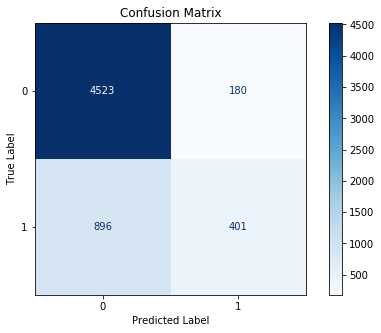

In [19]:
matrix = plot_confusion_matrix(logreg, X_test, y_test, values_format = 'd', cmap = plt.cm.Blues)
matrix.ax_.set_title('Confusion Matrix', color = 'black')
plt.xlabel('Predicted Label', color = 'black')
plt.ylabel('True Label', color = 'black')
plt.gcf().axes[0].tick_params(color = 'black')
plt.gcf().axes[1].tick_params(color = 'black')
plt.gcf().set_size_inches(8, 5)
plt.show()

Random (chance) Prediction: AUC = 0.500
Logistic Regression: AUC = 0.756


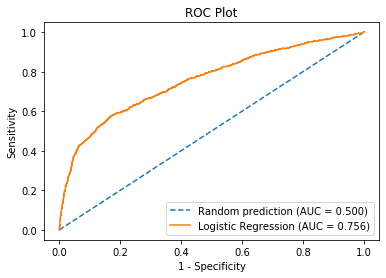

In [20]:
r_probs = [0 for _ in range(len(y_test))]
LR_probs = logreg.predict_proba(X_test)


LR_probs = LR_probs[:, 1]

from sklearn.metrics import roc_curve, roc_auc_score


r_auc = roc_auc_score(y_test, r_probs)
LR_auc = roc_auc_score(y_test, LR_probs)


print('Random (chance) Prediction: AUC = %.3f' % (r_auc))
print('Logistic Regression: AUC = %.3f' % (LR_auc))

r_fpr, r_tpr, _ = roc_curve(y_test, r_probs)
LR_fpr, LR_tpr, _ = roc_curve(y_test, LR_probs)

plt.plot(r_fpr, r_tpr, linestyle='--', label='Random prediction (AUC = %0.3f)' % r_auc)
plt.plot(LR_fpr, LR_tpr, marker=',', label='Logistic Regression (AUC = %0.3f)' % LR_auc)

# Title
plt.title('ROC Plot')
# Axis labels
plt.xlabel('1 - Specificity')
plt.ylabel('Sensitivity')
# Show legend
plt.legend() # 
# Show plot
plt.show()

## KNN Classifier

In [21]:
# train your model using all data and the best known parameters
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 24)
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=24, p=2,
                     weights='uniform')

In [22]:
# Predicting the Test set results
y_pred = knn.predict(X_test)
y_pred_prob = logreg.predict_proba(X_test)[:, 1]

In [23]:
# Making the Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy = accuracy_score(y_test, y_pred)
print(accuracy)
metric.loc['accuracy', 'KNN'] = accuracy_score(y_pred = y_pred, y_true = y_test)
metric.loc['precision', 'KNN'] = precision_score(y_pred = y_pred, y_true = y_test)
metric.loc['recall', 'KNN'] = recall_score(y_pred = y_pred, y_true = y_test)

[[4492  211]
 [ 906  391]]
0.8138333333333333


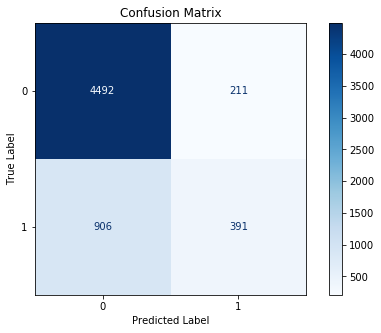

In [24]:
matrix = plot_confusion_matrix(knn, X_test, y_test, values_format = 'd', cmap = plt.cm.Blues)
matrix.ax_.set_title('Confusion Matrix', color = 'black')
plt.xlabel('Predicted Label', color = 'black')
plt.ylabel('True Label', color = 'black')
plt.gcf().axes[0].tick_params(color = 'black')
plt.gcf().axes[1].tick_params(color = 'black')
plt.gcf().set_size_inches(8, 5)
plt.show()

Random (chance) Prediction: AUC = 0.500
KNN: AUC = 0.743


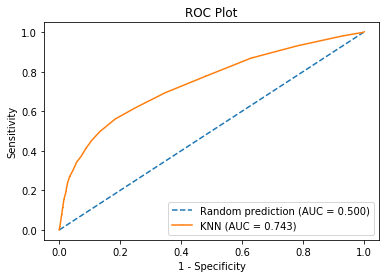

In [25]:
r_probs = [0 for _ in range(len(y_test))]
KNN_probs = knn.predict_proba(X_test)


KNN_probs = KNN_probs[:, 1]

from sklearn.metrics import roc_curve, roc_auc_score


r_auc = roc_auc_score(y_test, r_probs)
KNN_auc = roc_auc_score(y_test, KNN_probs)


print('Random (chance) Prediction: AUC = %.3f' % (r_auc))
print('KNN: AUC = %.3f' % (KNN_auc))

r_fpr, r_tpr, _ = roc_curve(y_test, r_probs)
KNN_fpr, KNN_tpr, _ = roc_curve(y_test, KNN_probs)

plt.plot(r_fpr, r_tpr, linestyle='--', label='Random prediction (AUC = %0.3f)' % r_auc)
plt.plot(KNN_fpr, KNN_tpr, marker=',', label='KNN (AUC = %0.3f)' % KNN_auc)

# Title
plt.title('ROC Plot')
# Axis labels
plt.xlabel('1 - Specificity')
plt.ylabel('Sensitivity')
# Show legend
plt.legend() # 
# Show plot
plt.show()

## Decision Tree Classifier

In [26]:
# Training the Decision Tree model on the Training set
from sklearn.tree import DecisionTreeClassifier
DTC = DecisionTreeClassifier(min_samples_split = 30, min_samples_leaf = 10)
DTC.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=10, min_samples_split=30,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [27]:
# Predicting the Test set results
y_pred = DTC.predict(X_test)

In [28]:
# Making the Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy = accuracy_score(y_test, y_pred)
print(accuracy)
metric.loc['accuracy', 'Decision Tree'] = accuracy_score(y_pred = y_pred, y_true = y_test)
metric.loc['precision', 'Decision Tree'] = precision_score(y_pred = y_pred, y_true = y_test)
metric.loc['recall', 'Decision Tree'] = recall_score(y_pred = y_pred, y_true = y_test)

[[4248  455]
 [ 821  476]]
0.7873333333333333


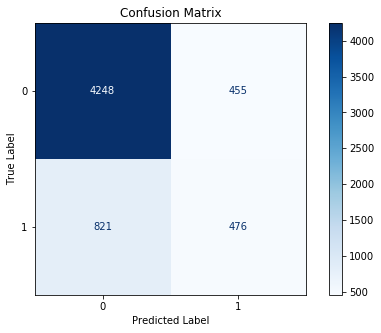

In [29]:
matrix = plot_confusion_matrix(DTC, X_test, y_test, values_format = 'd', cmap = plt.cm.Blues)
matrix.ax_.set_title('Confusion Matrix', color = 'black')
plt.xlabel('Predicted Label', color = 'black')
plt.ylabel('True Label', color = 'black')
plt.gcf().axes[0].tick_params(color = 'black')
plt.gcf().axes[1].tick_params(color = 'black')
plt.gcf().set_size_inches(8, 5)
plt.show()

Random (chance) Prediction: AUC = 0.500
Decision Tree: AUC = 0.707


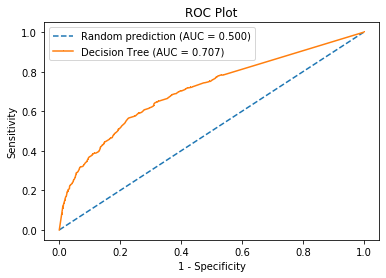

In [30]:
r_probs = [0 for _ in range(len(y_test))]
DT_probs = DTC.predict_proba(X_test)


DT_probs = DT_probs[:, 1]

from sklearn.metrics import roc_curve, roc_auc_score


r_auc = roc_auc_score(y_test, r_probs)
DT_auc = roc_auc_score(y_test, DT_probs)


print('Random (chance) Prediction: AUC = %.3f' % (r_auc))
print('Decision Tree: AUC = %.3f' % (DT_auc))

r_fpr, r_tpr, _ = roc_curve(y_test, r_probs)
DT_fpr, DT_tpr, _ = roc_curve(y_test, DT_probs)

plt.plot(r_fpr, r_tpr, linestyle='--', label='Random prediction (AUC = %0.3f)' % r_auc)
plt.plot(DT_fpr, DT_tpr, marker=',', label='Decision Tree (AUC = %0.3f)' % DT_auc)

# Title
plt.title('ROC Plot')
# Axis labels
plt.xlabel('1 - Specificity')
plt.ylabel('Sensitivity')
# Show legend
plt.legend() # 
# Show plot
plt.show()

## Random Forest classifier

In [31]:
# Training the Random Forest model on the Training set
from sklearn.ensemble import RandomForestClassifier
RFC = RandomForestClassifier(n_estimators = 100, min_samples_split = 30, min_samples_leaf = 10)
RFC.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=10, min_samples_split=30,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [32]:
# Predicting the Test set results
y_pred = RFC.predict(X_test)

In [33]:
# Making the Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy = accuracy_score(y_test, y_pred)
print(accuracy)
metric.loc['accuracy', 'Random Forest'] = accuracy_score(y_pred = y_pred, y_true = y_test)
metric.loc['precision', 'Random Forest'] = precision_score(y_pred = y_pred, y_true = y_test)
metric.loc['recall', 'Random Forest'] = recall_score(y_pred = y_pred, y_true = y_test)

[[4492  211]
 [ 822  475]]
0.8278333333333333


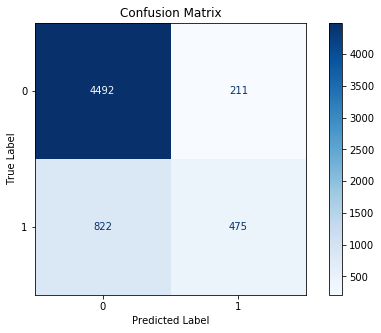

In [34]:
matrix = plot_confusion_matrix(RFC, X_test, y_test, values_format = 'd', cmap = plt.cm.Blues)
matrix.ax_.set_title('Confusion Matrix', color = 'black')
plt.xlabel('Predicted Label', color = 'black')
plt.ylabel('True Label', color = 'black')
plt.gcf().axes[0].tick_params(color = 'black')
plt.gcf().axes[1].tick_params(color = 'black')
plt.gcf().set_size_inches(8, 5)
plt.show()

Random (chance) Prediction: AUC = 0.500
Random Forest: AUC = 0.777


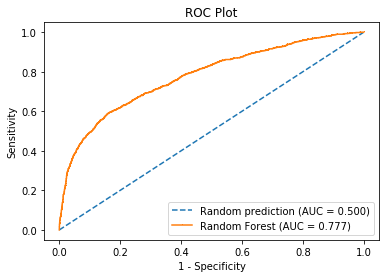

In [35]:
r_probs = [0 for _ in range(len(y_test))]
RF_probs = RFC.predict_proba(X_test)


RF_probs = RF_probs[:, 1]

from sklearn.metrics import roc_curve, roc_auc_score


r_auc = roc_auc_score(y_test, r_probs)
RF_auc = roc_auc_score(y_test, RF_probs)


print('Random (chance) Prediction: AUC = %.3f' % (r_auc))
print('Random Forest: AUC = %.3f' % (RF_auc))

r_fpr, r_tpr, _ = roc_curve(y_test, r_probs)
RF_fpr, RF_tpr, _ = roc_curve(y_test, RF_probs)

plt.plot(r_fpr, r_tpr, linestyle='--', label='Random prediction (AUC = %0.3f)' % r_auc)
plt.plot(RF_fpr, RF_tpr, marker=',', label='Random Forest (AUC = %0.3f)' % RF_auc)

# Title
plt.title('ROC Plot')
# Axis labels
plt.xlabel('1 - Specificity')
plt.ylabel('Sensitivity')
# Show legend
plt.legend() # 
# Show plot
plt.show()

## Naive Bayes Classifier

In [36]:
# Training the Naive Bayes model on the Training set
from sklearn.naive_bayes import GaussianNB
NBC = GaussianNB()
NBC.fit(X_train, y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [37]:
# Predicting the Test set results
y_pred = NBC.predict(X_test)

In [38]:
# Making the Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy = accuracy_score(y_test, y_pred)
print(accuracy)
metric.loc['accuracy', 'Naive Bayes'] = accuracy_score(y_pred = y_pred, y_true = y_test)
metric.loc['precision', 'Naive Bayes'] = precision_score(y_pred = y_pred, y_true = y_test)
metric.loc['recall', 'Naive Bayes'] = recall_score(y_pred = y_pred, y_true = y_test)

[[3854  849]
 [ 556  741]]
0.7658333333333334


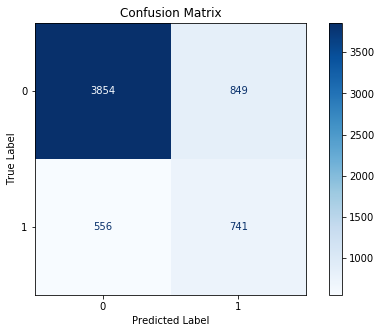

In [39]:
matrix = plot_confusion_matrix(NBC, X_test, y_test, values_format = 'd', cmap = plt.cm.Blues)
matrix.ax_.set_title('Confusion Matrix', color = 'black')
plt.xlabel('Predicted Label', color = 'black')
plt.ylabel('True Label', color = 'black')
plt.gcf().axes[0].tick_params(color = 'black')
plt.gcf().axes[1].tick_params(color = 'black')
plt.gcf().set_size_inches(8, 5)
plt.show()

Random (chance) Prediction: AUC = 0.500
Naive Bayes: AUC = 0.746


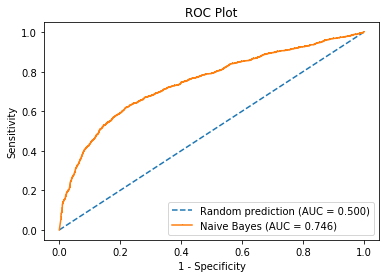

In [40]:
r_probs = [0 for _ in range(len(y_test))]
NB_probs = NBC.predict_proba(X_test)


NB_probs = NB_probs[:, 1]

from sklearn.metrics import roc_curve, roc_auc_score


r_auc = roc_auc_score(y_test, r_probs)
NB_auc = roc_auc_score(y_test, NB_probs)


print('Random (chance) Prediction: AUC = %.3f' % (r_auc))
print('Naive Bayes: AUC = %.3f' % (NB_auc))

r_fpr, r_tpr, _ = roc_curve(y_test, r_probs)
NB_fpr, NB_tpr, _ = roc_curve(y_test, NB_probs)

plt.plot(r_fpr, r_tpr, linestyle='--', label='Random prediction (AUC = %0.3f)' % r_auc)
plt.plot(NB_fpr, NB_tpr, marker=',', label='Naive Bayes (AUC = %0.3f)' % NB_auc)

# Title
plt.title('ROC Plot')
# Axis labels
plt.xlabel('1 - Specificity')
plt.ylabel('Sensitivity')
# Show legend
plt.legend() # 
# Show plot
plt.show()

## Neural Network Classifier

In [41]:
# Training the Naive Bayes model on the Training set
from sklearn.neural_network import MLPClassifier
NNC = MLPClassifier(solver='sgd', alpha=1e-5)
NNC.fit(X_train, y_train)

MLPClassifier(activation='relu', alpha=1e-05, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(100,), learning_rate='constant',
              learning_rate_init=0.001, max_fun=15000, max_iter=200,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=None, shuffle=True, solver='sgd',
              tol=0.0001, validation_fraction=0.1, verbose=False,
              warm_start=False)

In [42]:
# Predicting the Test set results
y_pred = NNC.predict(X_test)

In [43]:
# Making the Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy = accuracy_score(y_test, y_pred)
print(accuracy)
metric.loc['accuracy', 'Neural Network'] = accuracy_score(y_pred = y_pred, y_true = y_test)
metric.loc['precision', 'Neural Network'] = precision_score(y_pred = y_pred, y_true = y_test)
metric.loc['recall', 'Neural Network'] = recall_score(y_pred = y_pred, y_true = y_test)

[[4463  240]
 [ 824  473]]
0.8226666666666667


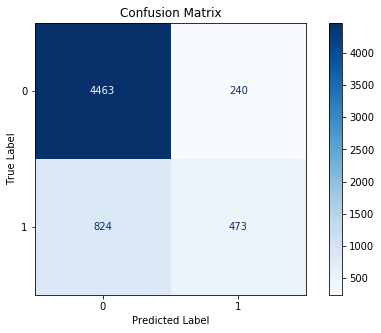

In [44]:
matrix = plot_confusion_matrix(NNC, X_test, y_test, values_format = 'd', cmap = plt.cm.Blues)
matrix.ax_.set_title('Confusion Matrix', color = 'black')
plt.xlabel('Predicted Label', color = 'black')
plt.ylabel('True Label', color = 'black')
plt.gcf().axes[0].tick_params(color = 'black')
plt.gcf().axes[1].tick_params(color = 'black')
plt.gcf().set_size_inches(8, 5)
plt.show()

Random (chance) Prediction: AUC = 0.500
Neural Network: AUC = 0.769


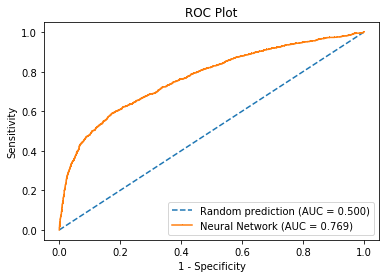

In [45]:
r_probs = [0 for _ in range(len(y_test))]
NN_probs = NNC.predict_proba(X_test)


NN_probs = NN_probs[:, 1]

from sklearn.metrics import roc_curve, roc_auc_score


r_auc = roc_auc_score(y_test, r_probs)
NN_auc = roc_auc_score(y_test, NN_probs)


print('Random (chance) Prediction: AUC = %.3f' % (r_auc))
print('Neural Network: AUC = %.3f' % (NN_auc))

r_fpr, r_tpr, _ = roc_curve(y_test, r_probs)
NN_fpr, NN_tpr, _ = roc_curve(y_test, NN_probs)

plt.plot(r_fpr, r_tpr, linestyle='--', label='Random prediction (AUC = %0.3f)' % r_auc)
plt.plot(NN_fpr, NN_tpr, marker=',', label='Neural Network (AUC = %0.3f)' % NN_auc)

# Title
plt.title('ROC Plot')
# Axis labels
plt.xlabel('1 - Specificity')
plt.ylabel('Sensitivity')
# Show legend
plt.legend() # 
# Show plot
plt.show()

## Models comparison

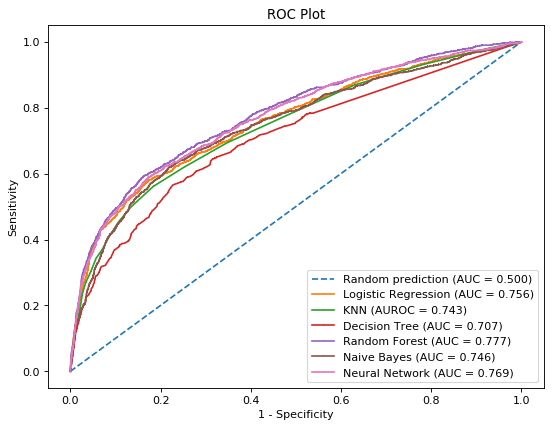

In [48]:
from matplotlib.pyplot import figure
figure(num=None, figsize=(8, 6), dpi=80, facecolor='w', edgecolor='k')

plt.plot(r_fpr, r_tpr, linestyle='--', label='Random prediction (AUC = %0.3f)' % r_auc)
plt.plot(LR_fpr, LR_tpr, marker=',', label='Logistic Regression (AUC = %0.3f)' % LR_auc)
plt.plot(KNN_fpr, KNN_tpr, marker=',', label='KNN (AUROC = %0.3f)' % KNN_auc)
plt.plot(DT_fpr, DT_tpr, marker=',', label='Decision Tree (AUC = %0.3f)' % DT_auc)
plt.plot(RF_fpr, RF_tpr, marker=',', label='Random Forest (AUC = %0.3f)' % RF_auc)
plt.plot(NB_fpr, NB_tpr, marker=',', label='Naive Bayes (AUC = %0.3f)' % NB_auc)
plt.plot(NN_fpr, NN_tpr, marker=',', label='Neural Network (AUC = %0.3f)' % NN_auc)

# Title
plt.title('ROC Plot')
# Axis labels
plt.xlabel('1 - Specificity')
plt.ylabel('Sensitivity')
# Show legend
plt.legend() # 
# Show plot
plt.show()

In [47]:
100*metric

,Logistic Regression,KNN,Decision Tree,Random Forest,Naive Bayes,Neural Network
accuracy,82.0667,81.3833,78.7333,82.7833,76.5833,82.2667
precision,69.0189,64.9502,51.1278,69.242,46.6038,66.3394
recall,30.9175,30.1465,36.7001,36.623,57.1318,36.4688
